In [2]:
import numpy as np
from matplotlib import pyplot as plt 
import ipywidgets as widgets

plt.rcParams["font.size"] = 18

# 各定数変換
$$
k = \dfrac{2\pi}{\lambda} \\
f = \dfrac{c}{\lambda} \\
\omega = 2\pi f
$$

In [2]:
l = 633e-9
k = 2 * np.pi/l
c = 299792458
w = 2 * np.pi * c / l

# 円偏光
$$
E_{\pm} = \dfrac{E_0}{\sqrt{2}}( \mathbf i \pm i \mathbf j )exp \left( -i \omega \left( t- \dfrac{N_\pm}{c} z \right) \right)
$$
$\mathbf i, \mathbf j$は$x,y$方向の単位ベクトル。$E_+,E_-$はそれぞれ右円偏光、左円偏光
$$\mathbf i =
\begin{pmatrix}
1 \\
0 \\
\end{pmatrix} ,
\mathbf j =
\begin{pmatrix}
0 \\
1 \\
\end{pmatrix} \\

\begin{aligned}
E_+ &= \dfrac{E_0}{\sqrt{2}}( \mathbf i + i \mathbf j )exp \left( -i \omega \left( t- \dfrac{N_+}{c} z \right) \right) \\

&= \dfrac{E_0}{\sqrt{2}}
\begin{pmatrix}
1 \\
i \\
\end{pmatrix}
exp \left( -i \omega \left( t- \dfrac{N_+}{c} z \right) \right) \\

&= \dfrac{E_0}{\sqrt{2}}
\begin{pmatrix}
1 \\
i \\
\end{pmatrix}
exp ( -i \omega t ) exp \left( i \dfrac{N_+}{c}z \right) \\

&= \dfrac{E_0}{\sqrt{2}}
\begin{pmatrix}
1 \\
i \\
\end{pmatrix}
exp ( -i \omega t ) \left( \cos \left( \dfrac{N_+}{c}z \right) + i \sin \left( \dfrac{N_+}{c}z \right) \right) \\

&= \dfrac{E_0}{\sqrt{2}}
exp ( -i \omega t )
\begin{pmatrix}
\cos \left( \dfrac{N_+}{c}z \right) + i \sin \left( \dfrac{N_+}{c}z \right) \\
-\sin \left( \dfrac{N_+}{c}z \right) + i \cos \left( \dfrac{N_+}{c}z \right) \\
\end{pmatrix} \\

E_- &= \dfrac{E_0}{\sqrt{2}}( \mathbf i - i \mathbf j )exp \left( -i \omega \left( t- \dfrac{N_-}{c} z \right) \right) \\

&= \dfrac{E_0}{\sqrt{2}}
\begin{pmatrix}
1 \\
-i \\
\end{pmatrix}
exp \left( -i \omega \left( t- \dfrac{N_-}{c} z \right) \right) \\

&= \dfrac{E_0}{\sqrt{2}}
exp ( -i \omega t )
\begin{pmatrix}
\cos \left( \dfrac{N_-}{c}z \right) + i \sin \left( \dfrac{N_-}{c}z \right) \\
\sin \left( \dfrac{N_-}{c}z \right) - i \cos \left( \dfrac{N_-}{c}z \right) \\
\end{pmatrix}
\end{aligned}
$$

## 円偏光の変調

(-2.0, 2.0)

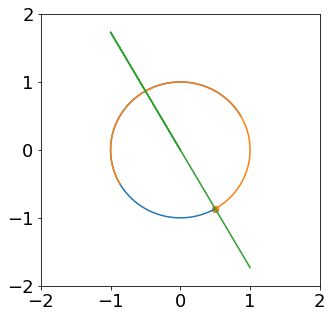

In [9]:
z = np.linspace(0, 3 * np.pi / 2, 100)
phase = np.pi/3
rcp_x = np.exp(1.0j * z) * np.exp(-1.0j * -phase)
rcp_y = 1.0j * np.exp(1.0j * z) * np.exp(-1.0j * -phase)

lcp_x = np.exp(1.0j * z) * np.exp(-1.0j * phase)
lcp_y = -1.0j * np.exp(1.0j * z) * np.exp(-1.0j * phase)

tot_x = rcp_x + lcp_x
tpt_y = rcp_y + lcp_y

plt.figure(figsize=(5,5))
plt.plot(rcp_x.real, rcp_y.real)
plt.scatter(rcp_x[0].real, rcp_y[0].real)
plt.plot(lcp_x.real, lcp_y.real)
plt.scatter(lcp_x[0].real, lcp_y[0].real)
plt.plot(tot_x.real, tpt_y.real)
plt.xlim(-2, 2)
plt.ylim(-2, 2)

# ファラデー効果

# 円偏光の伝搬

$$
\begin{aligned}
E_+ &=
\dfrac{E_0}{\sqrt{2}}
\begin{pmatrix}
1 \\
i \\
\end{pmatrix}
exp ( -i \omega t ) exp \left( i \dfrac{N_+}{c}z \right) exp \left( ikr \right) \\

&= \dfrac{E_0}{\sqrt{2}}
\begin{pmatrix}
1 \\
i \\
\end{pmatrix}
\left(
\cos \left( \dfrac{N_+}{c}z \right) + i \sin \left( \dfrac{N_+}{c}z \right)
\right)
\left(
\cos \left( kr \right) + i \sin \left( kr \right)
\right) \\

&= \dfrac{E_0}{\sqrt{2}}
\begin{pmatrix}
1 \\
i \\
\end{pmatrix}
\left\{
\left(
  \cos \left( \dfrac{N_+}{c}z \right) \cos \left( kr \right) - \sin \left( \dfrac{N_+}{c}z \right) \sin \left( kr \right)
\right)
+i
\left(
  \cos \left( \dfrac{N_+}{c}z \right) \sin \left( kr \right) + \sin \left( \dfrac{N_+}{c}z \right) \cos \left( kr \right)
\right)
\right\} \\

&= \dfrac{E_0}{\sqrt{2}}
\begin{pmatrix}
\left(
  \cos \left( \dfrac{N_+}{c}z \right) \cos \left( kr \right) - \sin \left( \dfrac{N_+}{c}z \right) \sin \left( kr \right)
\right)
+i
\left(
  \cos \left( \dfrac{N_+}{c}z \right) \sin \left( kr \right) + \sin \left( \dfrac{N_+}{c}z \right) \cos \left( kr \right)
\right) \\
-\left(
  \cos \left( \dfrac{N_+}{c}z \right) \sin \left( kr \right) + \sin \left( \dfrac{N_+}{c}z \right) \cos \left( kr \right)
\right)
+i
\left(
  \cos \left( \dfrac{N_+}{c}z \right) \cos \left( kr \right) - \sin \left( \dfrac{N_+}{c}z \right) \sin \left( kr \right)
\right) \\
\end{pmatrix} \\

E_- &=
\dfrac{E_0}{\sqrt{2}}
\begin{pmatrix}
1 \\
-i \\
\end{pmatrix}
exp ( -i \omega t ) exp \left( i \dfrac{N_-}{c}z \right) exp \left( ikr \right) \\
\end{aligned}
$$

(-2.0, 2.0)

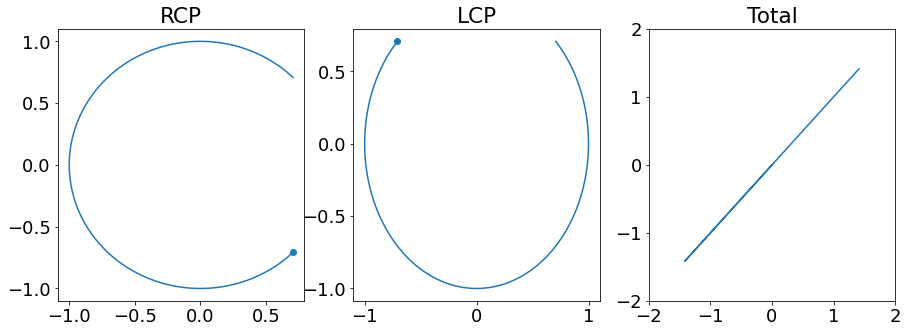

In [4]:
l = 633.0e-9
k = 2 * np.pi / l
r = l / 4

z = np.linspace(0, 3 * np.pi / 2, 100)
phase = 45 * np.pi / 180

rcp_x = np.exp(1.0j * (z - phase)) * np.exp(1.0j * k * r)
rcp_y = 1.0j * np.exp(1.0j * (z - phase)) * np.exp(1.0j * k * r)

lcp_x = np.exp(1.0j * (z + phase)) * np.exp(1.0j * k * r)
lcp_y = -1.0j * np.exp(1.0j * (z + phase)) * np.exp(1.0j * k * r)

tot_x = rcp_x + lcp_x
tpt_y = rcp_y + lcp_y

fig, axes = plt.subplots(1, 3, figsize=(15,5))
axes[0].set_title("RCP")
axes[0].plot(rcp_x.real, rcp_y.real)
axes[0].scatter(rcp_x[0].real, rcp_y[0].real)
axes[1].set_title("LCP")
axes[1].plot(lcp_x.real, lcp_y.real)
axes[1].scatter(lcp_x[0].real, lcp_y[0].real)
axes[2].set_title("Total")
axes[2].plot(tot_x.real, tpt_y.real)
plt.xlim(-2, 2)
plt.ylim(-2, 2)

# 楕円偏光
$$
\begin{pmatrix}
E_x \\
E_y \\
\end{pmatrix}
=
\begin{pmatrix}
A_x e^{j(wt-kz)} \\
A_y e^{j(wt-kz + \phi)} \\
\end{pmatrix}
$$

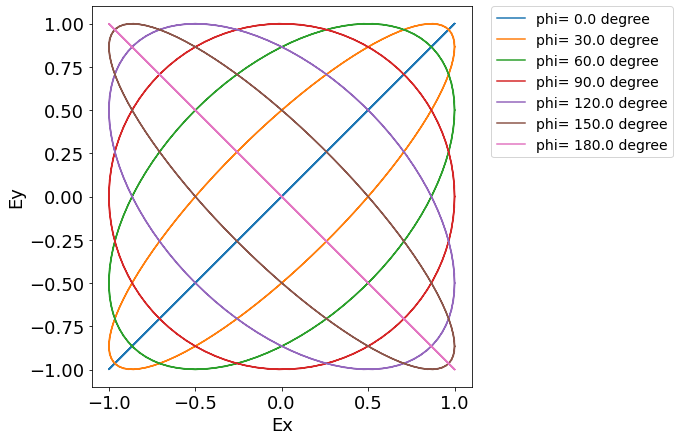

In [22]:
z = np.linspace(0, l * 2, 100)
t = 0
Ax = Ay = 1
phi =np.arange(0, np.pi+np.pi/6, np.pi/6)
ax = plt.figure(figsize=(9,7)).add_subplot()
for p in phi:
  Ex = Ax*np.exp(1j*(w*t-k*z))
  Ey = Ax*np.exp(1j*(w*t-k*z + p))
  # plot
  ax.plot(Ex.real, Ey.real, label='phi= ' + str(np.round(p * 180 / np.pi)) + " degree")
ax.set_xlabel("Ex")
ax.set_ylabel("Ey")
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=14)
ax.set_aspect('equal')
plt.show()

楕円偏光の別表記
$$
E_r=A_r e^{-j(wt-kr)} \\
E_l = A_l e^{j(wt-kr)}　\\
E = E_r+E_l \\
$$
逆回りの円偏光を足せば楕円偏光

In [4]:
i_vec = np.array([[1],
                  [0]])
j_vec = np.array([[0], 
                  [1]])

r_pol = 1/np.sqrt(2) * (i_vec + 1j*j_vec)
t = np.linspace(0, 3e-15, 300)

def change_phase(a, p):
  E1 = 1/np.sqrt(2) * np.exp(-1j*(w*t))
  E2 = a/np.sqrt(2) * np.exp(1j*(w*t-p))
  E = E1 + E2
  fig = plt.figure(figsize=(7,7))
  ax = fig.add_subplot()
  ax.scatter(E1[0].imag, E1[0].real, color="b")
  ax.plot(E1.imag, E1.real, label=r'$E_R$',  color="b")
  ax.scatter(E2[0].imag, E2[0].real, color="orange")
  ax.plot(E2.imag, E2.real, label=r'$E_L$', color="orange")
  ax.scatter(E[0].imag, E[0].real, color="green")
  ax.plot(E.imag, E.real, label=r'$E_R + E_L$', color="green")
  ax.legend()
  ax.set_aspect('equal')
  ax.set_xlabel(r"$E_{im}$")
  ax.set_ylabel("$E_{re}$")

widgets.interact(change_phase, a=(0, 3, 0.1), p=(0, np.pi, np.pi/50))

interactive(children=(FloatSlider(value=1.0, description='a', max=3.0), FloatSlider(value=1.5079644737231008, …

<function __main__.change_phase(a, p)>

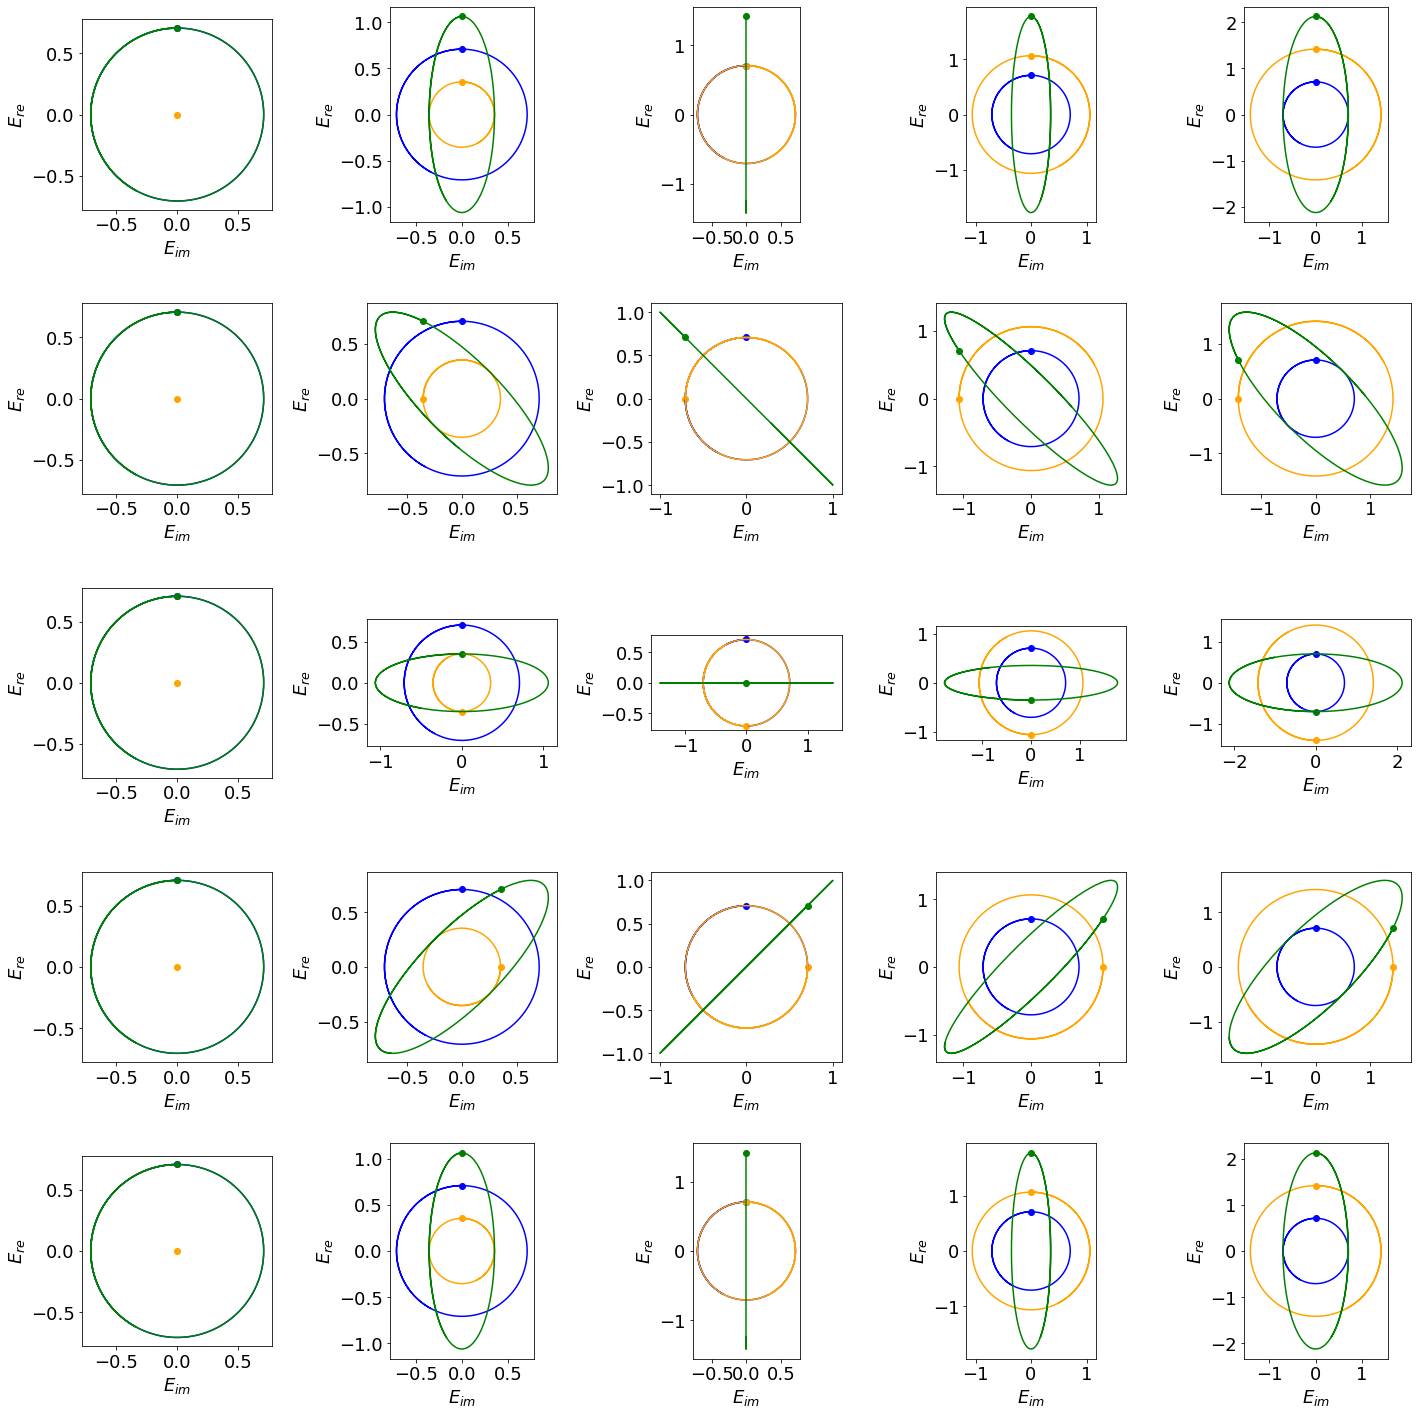

In [24]:
plot_num = 11
a = np.linspace(0, 2, 5)
p = np.linspace(0, 2*np.pi, 5)

fig, axes = plt.subplots(p.size, a.size, figsize=(20,20))

for row, axes_row in enumerate(axes):
  for col, ax in enumerate(axes_row):
    E1 = 1/np.sqrt(2) * np.exp(-1j*(w*t))
    E2 = a[col]/np.sqrt(2) * np.exp(1j*(w*t-p[row]))
    E = E1 + E2
    ax.scatter(E1[0].imag, E1[0].real, color="b")
    ax.plot(E1.imag, E1.real, label=r'$E_R$',  color="b")
    ax.scatter(E2[0].imag, E2[0].real, color="orange")
    ax.plot(E2.imag, E2.real, label=r'$E_L$', color="orange")
    ax.scatter(E[0].imag, E[0].real, color="green")
    ax.plot(E.imag, E.real, label=r'$E_R + E_L$', color="green")
    ax.set_aspect('equal')
    ax.set_xlabel(r"$E_{im}$")
    ax.set_ylabel("$E_{re}$")

fig.tight_layout()

円偏光だけで考えるならば
$$
E=e^{j(wt-kr)}
$$
で十分

In [25]:

i_vec = np.array([[1],
                  [0]])
j_vec = np.array([[0], 
                  [1]])

r_pol = 1/np.sqrt(2) * (i_vec + 1j*j_vec)
t = np.linspace(0, 3e-15, 300)

def change_phase(p):
  E1 = 1/np.sqrt(2) * np.exp(-1j*(w*t))
  E2 = 1.5/np.sqrt(2) * np.exp(-1j*(w*t-p))
  E = E1 + E2
  fig = plt.figure(figsize=(7,7))
  ax = fig.add_subplot()
  ax.scatter(E1[0].imag, E1[0].real, color="b")
  ax.plot(E1.imag, E1.real, color="b", label=r'$E_1$')
  ax.scatter(E2[0].imag, E2[0].real, color="orange")
  ax.plot(E2.imag, E2.real, color="orange", label=r'$E_2$')
  ax.scatter(E[0].imag, E[0].real, color="green")
  ax.plot(E.imag, E.real, color="green", label=r'$E=E_1 + E_2$')
  ax.legend()
  ax.set_aspect('equal')
  ax.set_xlabel(r"$E_{im}$")
  ax.set_ylabel(r"$E_{re}$")

widgets.interact(change_phase, p=(0, np.pi, np.pi/50))


interactive(children=(FloatSlider(value=1.5079644737231008, description='p', max=3.141592653589793, step=0.062…

<function __main__.change_phase(p)>

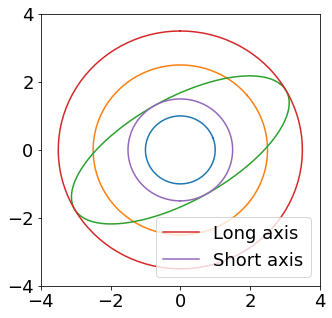

In [4]:
theta = 10 * np.pi/180
Ar = 1
Al = 2.5
x = np.linspace(0, 2*np.pi, 100)
rotat = np.exp(1.0j * (60 * np.pi/180))
rcp = Ar * np.exp(1j*(x+theta)) * rotat
lcp = Al * np.exp(-1j*(x+theta)) * rotat
eli = rcp + lcp
plt.figure(figsize=(5,5))
plt.plot(rcp.imag, rcp.real)
plt.plot(lcp.imag, lcp.real)
plt.plot(eli.imag, eli.real)
plt.plot((abs(rcp) + abs(lcp)) * np.sin(x), (abs(rcp)  + abs(lcp)) * np.cos(x), label="Long axis")
plt.plot((abs(rcp) - abs(lcp)) * np.sin(x), (abs(rcp)  - abs(lcp)) * np.cos(x), label="Short axis")
plt.ylim(-4,4)
plt.xlim(-4,4)
plt.legend()

# ストークスパラメータ

In [ ]:
I0 = np.abs(rcp) / np.sqrt(2)
I90 = np.abs(lcp) / np.sqrt(2)


# レーリーゾンマーフェルト(Reyleigh-Sommerfeld)
回折公式
$$
h(x,y,z) = \dfrac{1}{2\pi} \dfrac{z}{r} \left( \dfrac{1}{r}-jk \right) \dfrac{exp(jkr)}{r}
$$

In [27]:
def reyleigh_sommerfeld(z):
  plt.figure(figsize=(5,8))
  plt.title("z = "+ str(z) + "nm")
  z = z*1e-9
  y = np.linspace(-10*l, l*10, 100000)
  r = np.sqrt(z**2 + y**2)
  h = 1/(2*np.pi) * z / r * (1/r - 1j*k) * np.exp(1j * k * r) / r
  plt.plot(h.real, y, label="real")
  plt.plot(h.imag, y, label="image")
  plt.plot(np.abs(h), y, label="Abs")
  plt.legend()

widgets.interact(reyleigh_sommerfeld, z=(0, 10000,1))

interactive(children=(IntSlider(value=5000, description='z', max=10000), Output()), _dom_classes=('widget-inte…

<function __main__.reyleigh_sommerfeld(z)>

# レーリーゾンマーフェルト(Reyleigh-Sommerfeld)回折による干渉
$$
h(x,y,z) = \dfrac{1}{2\pi} \dfrac{z}{r} \left( \dfrac{1}{r}-jk \right) \dfrac{exp(jkr)}{r}
$$
開口の幅が$d$
開口が$2N+1$個あり,$y=-Nd\cdots Nd$に存在しているとき、開口から放たれる光は一つの点光源であるとすると
$$
\sum^{2N+1}_{n=0} \left( \dfrac{1}{2\pi} \dfrac{z}{r} \left( \dfrac{1}{r}-jk \right) \dfrac{exp(jkr)}{r} \right) \\
$$

In [28]:
def reyleigh_sommerfeld(x, y, z):
  r = np.sqrt(x**2 + y**2 + z**2)
  h = 1/(2*np.pi) * z / r * (1/r - 1j*k) * np.exp(1j * k * r) / r
  return h

均一な振幅の入力

Text(0, 0.5, 'y (cm)')

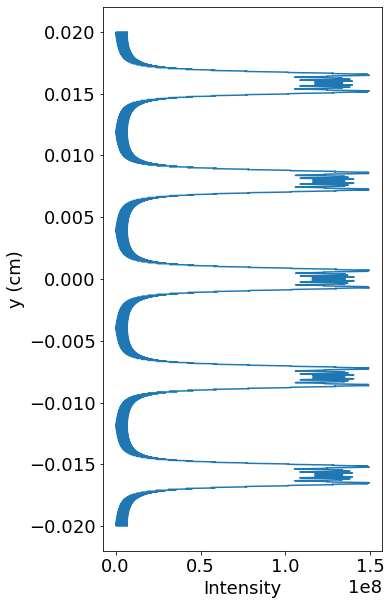

In [29]:
N = 50
M = 2*N+1
d = 20e-6
#sorce
sy = np.arange(-N*d, N*d + d/2, d)
y = np.arange(-20e-3, 20e-3, l/2)
y_each = np.ones((M,1)) * y - sy.reshape((-1,1)) # um
z = 25e-2 # cm
x = 0

I_each = reyleigh_sommerfeld(x, y_each, z)
I = np.sum(I_each, axis=0)

plt.figure(figsize=(5,10))
plt.plot(np.abs(I), y)
plt.xlabel("Intensity")
plt.ylabel("y (cm)")

入力の振幅に分布を持たせる

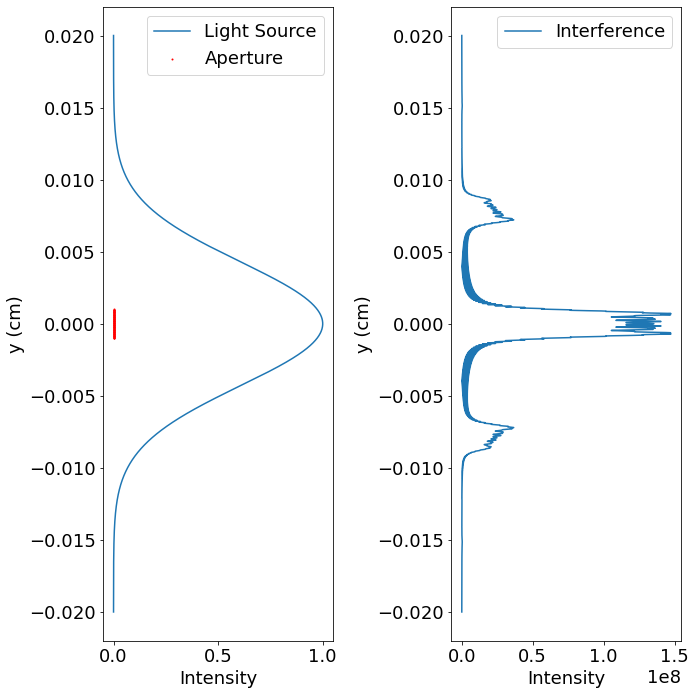

In [30]:
N = 50
M = 2*N+1
d = 20e-6
#sorce
sy = np.arange(-N*d, N*d + d/2, d)

y = np.arange(-20e-3, 20e-3, l)
y_each = np.ones((M,1)) * y - sy.reshape((-1,1)) # um
z = 25e-2 # cm
x = 0

expand_rad = 1.2e-3 # rad 広がり角
A = np.exp(-2*y**2/(10*0.8e-3 + 2 * z * np.tan(expand_rad))**2)
I_each = reyleigh_sommerfeld(x, y_each, z) * A
I = np.sum(I_each, axis=0)
fig, axes = plt.subplots(1, 2,figsize=(10,10))
axes[0].plot(A, y, label="Light Source")
axes[0].set_xlabel("Intensity")
axes[0].set_ylabel("y (cm)")
axes[0].scatter(np.zeros_like(sy), sy, s=1, label="Aperture", c="red")
axes[0].legend()

axes[1].plot(np.abs(I), y, label="Interference")
axes[1].set_xlabel("Intensity")
axes[1].set_ylabel("y (cm)")
axes[1].legend()
#axes[1].set_xlim((-1,100))
fig.tight_layout()

# 全結合条件

$$
\beta =\sin^{-1} \dfrac{\lambda/n}{2d_n} \\
z \geq\dfrac{\sqrt{N_v^2 + N_h^2}}{\tan \beta}d_n
$$

/var/folders/dq/z_0g0_d101gg2c_06s9yqp8h0000gn/T/ipykernel_85009/2546656510.py:6: RuntimeWarning: invalid value encountered in arcsin
  beta = np.arcsin(wl/n/(2*dn))


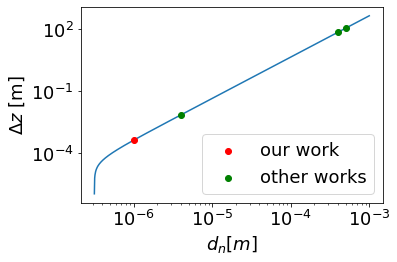

In [8]:
wl = 633e-9
n=1.0
dn = np.logspace(-7, -3, 1000)
Nv, Nh = 100, 100

beta = np.arcsin(wl/n/(2*dn))
z = np.sqrt(Nv**2 + Nh**2) * dn / np.tan(beta)

ow = np.array([4.0e-4, 4.0e-6, 5.0e-4])
oz = np.sqrt(Nv**2 + Nh**2) * ow / np.tan(np.arcsin(wl/(2*ow)))

plt.rcParams['figure.subplot.bottom'] = 0.20
plt.rcParams['figure.subplot.left'] = 0.20
plt.plot(dn, z, zorder=1)
plt.scatter(1.0e-6, np.sqrt(Nv**2 + Nh**2) * 1.0e-6 / np.tan(np.arcsin(wl/(2*1.0e-6))), color="red", label="our work")
plt.scatter(ow, oz, color="g", label="other works")
plt.xlabel(r"$d_n [m]$")
plt.ylabel(r"$\Delta z$ [m]")
plt.yscale("log")
plt.xscale("log")
plt.gca().set_facecolor("white")
plt.gca().spines["bottom"].set_color("black")
plt.gca().spines["top"].set_color("black")
plt.gca().spines["left"].set_color("black")
plt.gca().spines["right"].set_color("black")


plt.xticks([1.0e-6,1.0e-5, 1.0e-4,1.0e-3],["$10^{-6}$", "$10^{-5}$", "$10^{-4}$","$10^{-3}$"])
plt.legend()
plt.savefig("images/diffractive_angle.png")